In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

### Расчет значений

In [132]:
df = pd.read_csv("lab3.13.csv")
df2 = df.copy()
phi = 160 * np.pi / 180
mu0 = 4 * np.pi * 10 ** (-7)
n = 100
R = 0.15

In [133]:
df["I_mean"] = (df["I1"] + df["I2"] + df["I3"]) / 3
df["delta_a"] = df["delta_a"] * np.pi / 180
df["gamma"] = np.sin(df["delta_a"]) / (np.sin(phi - df["delta_a"]))
df["B_c"] = mu0 * (4/5) ** (3/2) * (df["I_mean"] / 1000) * n / R
#df["B_c"] *= 10 ** 6

In [134]:
df

,delta_a,I1,I2,I3,I_mean,gamma,B_c
0,0.174533,14,14,13,13.666667,0.347296,0.000008
1,0.349066,23,22,22,22.333333,0.532089,0.000013
2,0.523599,27,27,27,27.000000,0.652704,0.000016
3,0.698132,29,30,29,29.333333,0.742227,0.000018
4,0.872665,33,31,31,31.666667,0.815207,0.000019
5,1.047198,34,34,34,34.000000,0.879385,0.000020
6,1.221730,36,36,37,36.333333,0.939693,0.000022
7,1.396263,37,37,38,37.333333,1.000000,0.000022
8,1.570796,39,39,39,39.000000,1.064178,0.000023
9,1.745329,41,41,42,41.333333,1.137158,0.000025


In [135]:
reg = LinearRegression().fit(df["gamma"].to_numpy().reshape(-1, 1), df["B_c"].to_numpy())
slope1, intercept1 = reg.coef_[0], reg.intercept_

reg = linregress(df["gamma"], df["B_c"])

In [136]:
slope1 * 10 ** 6

14.772030799527904

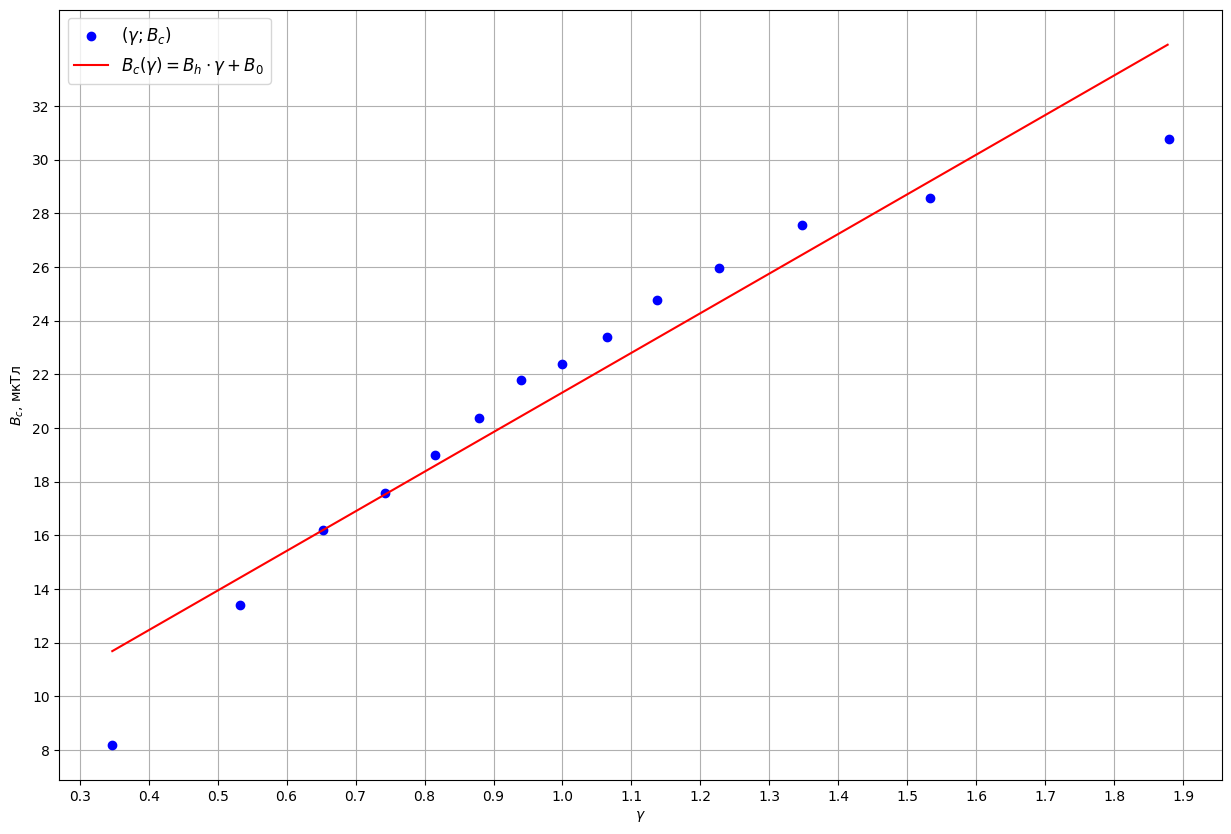

In [137]:
figure, axes = plt.subplots(figsize=(15, 10))
axes.set_xticks(np.arange(0, df["gamma"].max() + 0.1, 0.1))
axes.set_yticks(np.arange(0, df["B_c"].max() * 10 ** 6 + 2, 2))
axes.set_axisbelow(True)
axes.set_ylabel(r"$B_c$, " + "мкТл")
axes.set_xlabel(r"$\gamma$")

axes.scatter(df["gamma"], df["B_c"] * 10 ** 6, label=r"$(\gamma; B_c)$", color="blue")

X_values = np.arange(df["gamma"].min(), df["gamma"].max(), 0.01)
Y_values = slope1 * 10 ** 6 * X_values + intercept1 * 10 ** 6

axes.plot(X_values, Y_values, color="red", label=r"$B_c(\gamma)=B_h\cdot \gamma + B_0$")

axes.grid()
axes.legend(fontsize="large")

### Погрешности

In [149]:
reg = linregress(df["gamma"], df["B_c"])
slope = reg.slope
intercept = reg.intercept

n = len(df["B_c"])
di = df["B_c"].to_numpy() - (intercept + slope * df["gamma"])
D = np.sum((df["gamma"] - df["gamma"].mean()) ** 2)
Sb2 = np.sum(di ** 2) / (D * (n - 2))
Sa2 = np.sum(di ** 2) / (n - 2) * (1 / n + df["B_c"].mean() ** 2 / D)
delta_B = 2 * np.sqrt(Sb2)

In [158]:
delta_B

2.3757768186241334e-06

In [148]:
linregress(df["gamma"], df["B_c"]).stderr

1.1878884093120618e-06

### Сохранение данных

In [123]:
df["delta_a"] = df2["delta_a"]

In [128]:
df["I1"] = df["I1"].astype(float)
df["I2"] = df["I2"].astype(float)
df["I3"] = df["I3"].astype(float)
df["I_mean"] = round(df["I_mean"], 1)
df["gamma"] = round(df["gamma"], 2)
df["B_c"] = round(df["B_c"], 2)

In [130]:
df.to_csv("output.csv", index=False)